In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [357]:
data = pd.read_csv('./tvshows.csv')
data

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link
0,Queen Cleopatra,2023,TV-14,45m,1.2,86K,0,NaN,"Jada Pinkett Smith, Adele James, Craig Russell...","Documentary, Drama, History",United Kingdom,English,Nutopia,https://www.imdb.com/title/tt27528139/?ref_=sr...
1,Velma,2023–2024,TV-MA,25m,1.6,80K,0,Charlie Grandy,"Mindy Kaling, Glenn Howerton, Sam Richardson, ...","Animation, Adventure, Comedy, Crime, Horror, M...","United States, South Korea",English,"Charlie Grandy Productions, Kaling Internation...",https://www.imdb.com/title/tt14153790/?ref_=sr...
2,Keeping Up with the Kardashians,2007–2021,TV-14,44m,2.9,32K,0,"Ryan Seacrest, Eliot Goldberg","Khloé Kardashian, Kim Kardashian, Kourtney Kar...","Family, Reality-TV",United States,"English, Spanish","Bunim-Murray Productions (BMP), Ryan Seacrest ...",https://www.imdb.com/title/tt1086761/?ref_=sr_...
3,Batwoman,2019–2022,TV-14,45m,3.6,47K,0,Caroline Dries,"Camrus Johnson, Rachel Skarsten, Meagan Tandy,...","Action, Adventure, Crime, Drama, Sci-Fi",United States,English,"Berlanti Productions, DC Entertainment, Warner...",https://www.imdb.com/title/tt8712204/?ref_=sr_...
4,The Acolyte,2024,TV-14,35m,4.1,125K,0,Leslye Headland,"Lee Jung-jae, Amandla Stenberg, Manny Jacinto,...","Action, Adventure, Drama, Fantasy, Mystery, Sc...",United States,English,"Lucasfilm, Disney+, The Walt Disney Company",https://www.imdb.com/title/tt12262202/?ref_=sr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,The Wire,2002–2008,TV-MA,1h,9.3,390K,0,David Simon,"Dominic West, Lance Reddick, Sonja Sohn, Wende...","Crime, Drama, Thriller",United States,"English, Greek, Mandarin, Spanish","Blown Deadline Productions, Home Box Office (HBO)",https://www.imdb.com/title/tt0306414/?ref_=sr_i_5
1134,Planet Earth,2006,TV-PG,50m,9.4,223K,4,NaN,"Sigourney Weaver, David Attenborough, Nikolay ...","Documentary, Family","United Kingdom, Canada, United States, Japan",English,"British Broadcasting Corporation (BBC), Canadi...",https://www.imdb.com/title/tt0795176/?ref_=sr_i_4
1135,Band of Brothers,2001,TV-MA,1h,9.4,544K,6,NaN,"Scott Grimes, Damian Lewis, Ron Livingston, Sh...","Drama, History, War","United Kingdom, United States","English, Dutch, French, German, Lithuanian","DreamWorks, DreamWorks Television, HBO Films",https://www.imdb.com/title/tt0185906/?ref_=sr_i_3
1136,Planet Earth II,2016,TV-G,50m,9.5,162K,2,NaN,"David Attenborough, Michael J. Sanderson, Gord...",Documentary,"United Kingdom, Germany, France, China, United...","English, French","BBC Natural History Unit (NHU), BBC America, Z...",https://www.imdb.com/title/tt5491994/?ref_=sr_i_2


# Mean of each column

- Title: title of the show
- Years: year of broadcast of the show
- Certification: certification that the show has
- Runtime: Time limited of the show
- Rating: the score on 10 point scale
- Number of Votes: express vote of the show
- Emmys: the show has how much emmy prize
- Creators: The people or group people make the show
- Actor: The people join the show
- Genres: type of the show
- Countries of origins: the country originate the show
- Language: the language of the show
- Production Companies: the company produce the show
- Link: link of the show

# Check datatype of columns

In [320]:
data.dtypes

Title                    object
Years                    object
Certification            object
Runtime                  object
Rating                  float64
Number of Votes          object
Emmys                     int64
Creators                 object
Actors                   object
Genres                   object
Coutries of origins      object
Languages                object
Production companies     object
Link                     object
dtype: object

## See that we need to adjust the data type of some columns:  
### - Runtime  
### - Number of Votes  
### - Years

# Shape of data

In [321]:
# Size of data set
data.shape

(1138, 14)

So, the dataset with 1138 rows and 14 columns meets the requirements.

# Check duplicate

In [322]:
data[data.duplicated(keep=False)]

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link


The data in this dataset does not contain any rows that are entirely identical. This means that each row in the dataset is unique, with no duplication of all values across all columns between any two rows. This characteristic ensures that every record holds independent information and is not repeated, making data analysis more accurate and reliable

# Blank shell of each columns

In [323]:
data.isna().sum()

Title                     0
Years                     0
Certification            14
Runtime                  57
Rating                    0
Number of Votes           0
Emmys                     0
Creators                198
Actors                    1
Genres                    0
Coutries of origins       0
Languages                 0
Production companies     17
Link                      0
dtype: int64

The **Runtime** and **Creators** columns have quite a few missing values (NAN). However, the **Creators** column is not a critical factor that we need to focus on, so it can be ignored. Meanwhile, the **Runtime** column plays a more important role, and we will spend time handling this column in more detail in the subsequent steps.

# Change data in column Runtime about minute unit

Based on the data, we can easily observe that the **Runtime** column is divided into time units as follows: **h** represents hours, **m** represents minutes, and some values contain both **h** and **m**.

For the values in the **Runtime** column, we will process them as follows:

- **Case with both "h" and "m"**: Use the `split` function to separate the value into two parts based on the "h" character. The part before "h" will be converted to a number and multiplied by 60 (to convert to minutes), then added to the second part (the number of minutes).  
- **Case with only "h"**: Extract the part before "h," convert it to a number, and multiply it by 60.  
- **Case with only "m"**: Simply take the number of minutes from the value.  

This approach ensures that all values in the **Runtime** column are uniformly converted to minutes.

In [324]:
new_col = []  
for val in data['Runtime']:
    if isinstance(val, str):
        if 'h' in val and 'm' in val: # Case have hour and minute
            hour, min = val.split('h')
            min = min.split('m')[0]
            new_col.append(int(hour) * 60 + int(min))
        elif 'h' in val:  # Case only hour
            hour = val.split('h')[0]
            new_col.append(int(hour) * 60)
        elif 'm' in val:  # Case only minute
            min = val.split('m')[0]
            new_col.append(int(min))
        elif pd.isna(val):
            new_col.append(0)
    else:
        new_col.append(val)  #if val is not str then append the list

data['Runtime'] = new_col
# Convert the 'Runtime' column to integer type, filling any remaining NaN with 0 first
data['Runtime'] = data['Runtime'].fillna(0).astype('float')
print(data['Runtime'])

0       45.0
1       25.0
2       44.0
3       45.0
4       35.0
        ... 
1133    60.0
1134    50.0
1135    60.0
1136    50.0
1137    45.0
Name: Runtime, Length: 1138, dtype: float64


# Change data in column Number of Votes

In the dataset, we notice that some values in the column are formatted as numbers with the **K** (thousand) or **M** (million) suffixes. To process these, we need to convert the values into standard numerical format as follows:

- **If the value contains the "K" suffix**: Extract the number before the **K**, convert it to a numeric type, and then multiply by \( 10^3 \).  
- **If the value contains the "M" suffix**: Extract the number before the **M**, convert it to a numeric type, and then multiply by \( 10^6 \).  
- **If the value has no suffix**: Retain the value as it is.  

By doing this, we can standardize all the values in the column to a consistent numeric format.

In [325]:
new_col = []
for i in data['Number of Votes']:
    if 'K' in i:
        val = i.split('K')[0]
        new_col.append(int(float(val)*(10**3)))
    elif 'M' in i: 
        val = i.split('M')[0]
        new_col.append(int(float(val)*(10**6)))
data['Number of Votes'] = new_col
data['Number of Votes']

0         86000
1         80000
2         32000
3         47000
4        125000
         ...   
1133     390000
1134     223000
1135     544000
1136     162000
1137    2200000
Name: Number of Votes, Length: 1138, dtype: int64

# Handle Year column

To process the **Year** column with the format **2023–2024** (where the "–" is a special character different from the hyphen "-"), we will follow these steps:

1. **Replace the "–" character**: First, we need to replace the "–" with a regular hyphen "-" (which is easier to handle in Python) to ensure that all values can be easily split.

2. **Split the value into two parts**: After replacing the "–" character, if the **Year** column contains two years (e.g., "2023-2024"), we will split the value into two parts:
   - The first year (the start year of the release).
   - The second year (the end year of the release).
   These two years will be converted into a tuple in the form of (start_year, end_year).

3. **Handle cases with only one year**: If there is only one year (e.g., "2023"), we will assign that year to both the start and end years, and convert it into a tuple in the form of (year, year).

This approach ensures that the **Year** column is consistently converted into a tuple format, regardless of whether it represents a single year or a range of years.

In [326]:
def process_years(years):
    # Replace the special character '–' with '-'
    years = years.replace('–', '-')
    
    # Split the string by '-' and process the parts
    parts = years.split('-')
    year_start = int(parts[0]) if parts[0].isdigit() else None
    year_end = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else None
    
    return (year_start, year_end)


data['Years'] = data['Years'].apply(process_years)


print(data['Years'])

0       (2023, None)
1       (2023, 2024)
2       (2007, 2021)
3       (2019, 2022)
4       (2024, None)
            ...     
1133    (2002, 2008)
1134    (2006, None)
1135    (2001, None)
1136    (2016, None)
1137    (2008, 2013)
Name: Years, Length: 1138, dtype: object


We will use a boxplot to visualize the distribution of values in the dataset and identify outliers. A boxplot is a powerful tool that helps display the following characteristics of the data:

1. **Value Distribution**:  
   - The range of the data is represented through elements such as the median, interquartile range (IQR), and the minimum and maximum values within the non-outlier range.

2. **Outliers**:  
   - Values that fall outside the main data range (IQR) are shown as individual points, making it easy to identify and analyze them. 

This approach helps in understanding the overall data distribution and detecting anomalies effectively.

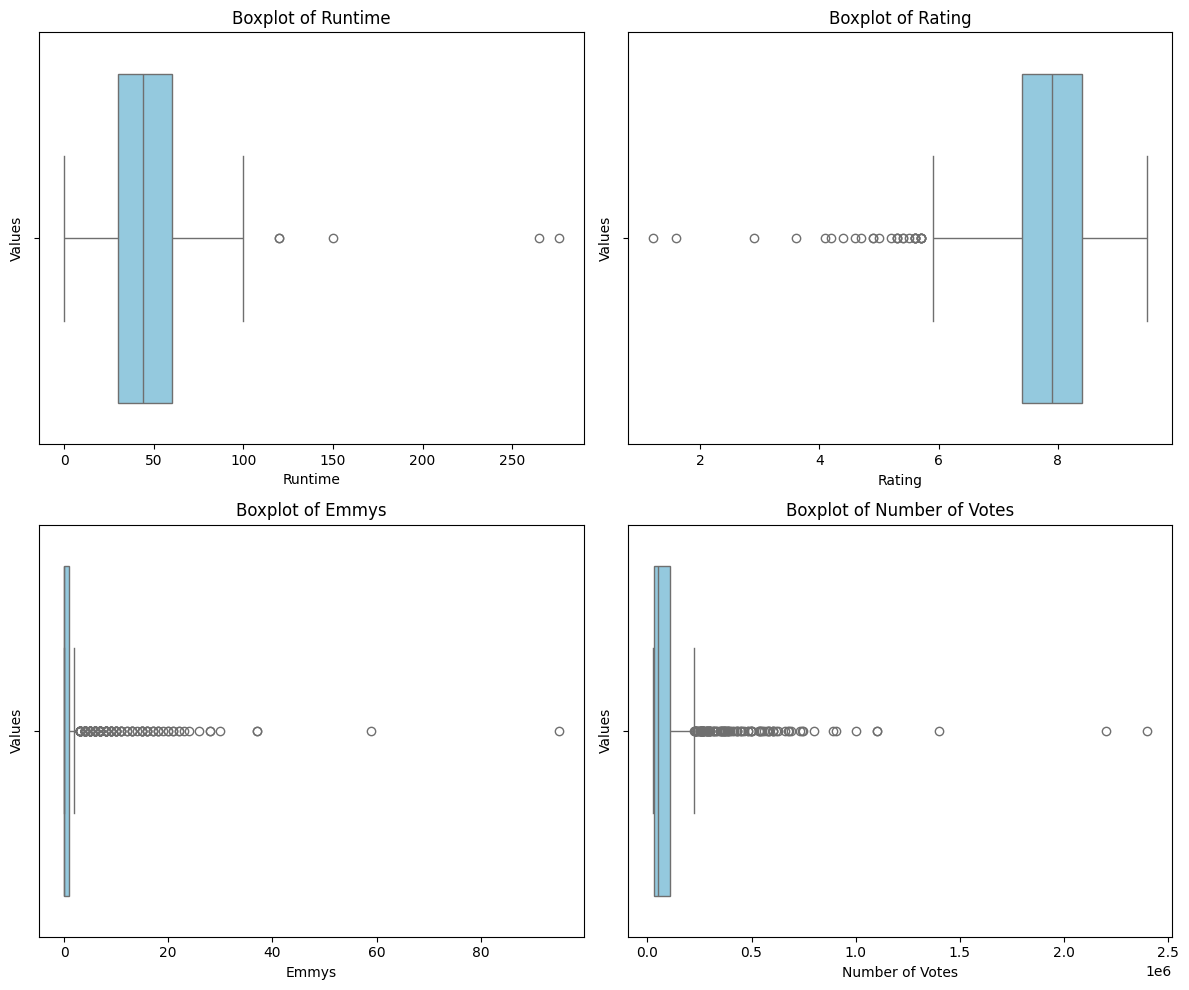

In [327]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

columns_to_plot = ['Runtime', 'Rating', 'Emmys', 'Number of Votes']

# Vẽ boxplot cho từng cột vào từng subplot
for i, column in enumerate(columns_to_plot):
    row = i // 2  
    col = i % 2   
    sns.boxplot(data=data, x=column, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f"Boxplot of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Values")


plt.tight_layout()
plt.show()

We will fill the NaN values with 0 before handling outliers. This ensures that missing values do not interfere with the outlier detection process and helps maintain consistency in the data during analysis.

In [328]:
data[['Rating', 'Emmys', 'Number of Votes']] = data[['Rating', 'Emmys', 'Number of Votes']].fillna(0)

# Scale value of numeric columns

Column: Runtime
Min: 0.0, Max: 276.0, Median: 44.0, Mean: 42.60456942003515
----------------------------------------


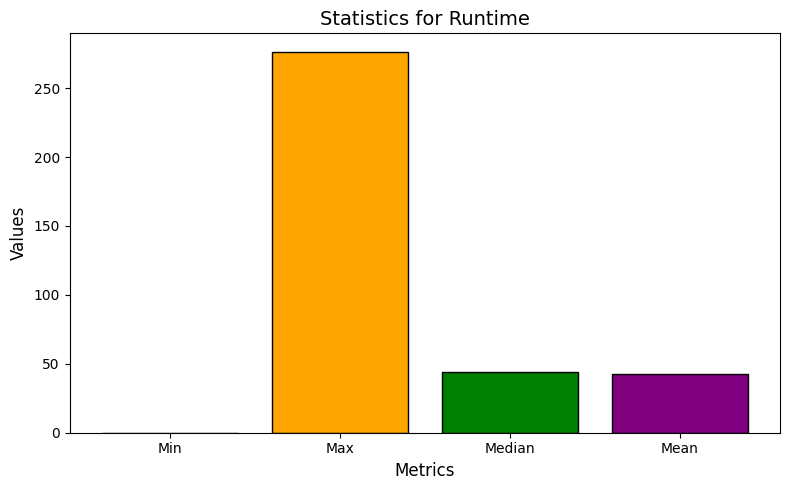

Column: Rating
Min: 1.2, Max: 9.5, Median: 7.9, Mean: 7.824077328646748
----------------------------------------


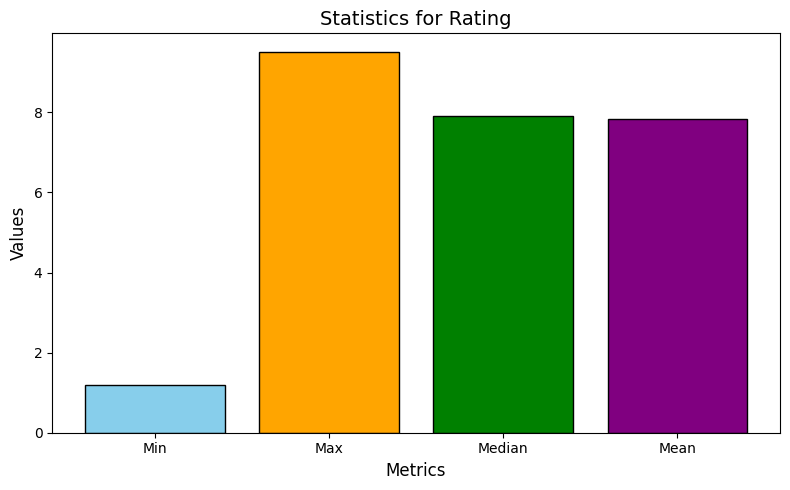

Column: Number of Votes
Min: 25000, Max: 2400000, Median: 53000.0, Mean: 105168.71704745168
----------------------------------------


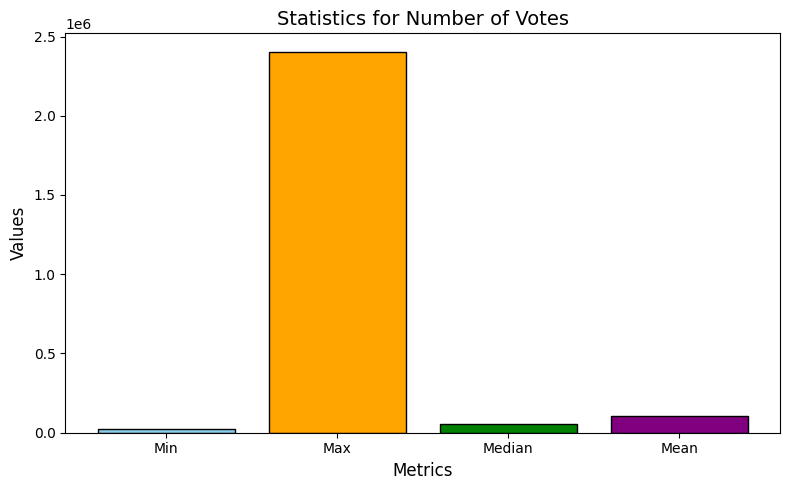

Column: Emmys
Min: 0, Max: 95, Median: 0.0, Mean: 1.578207381370826
----------------------------------------


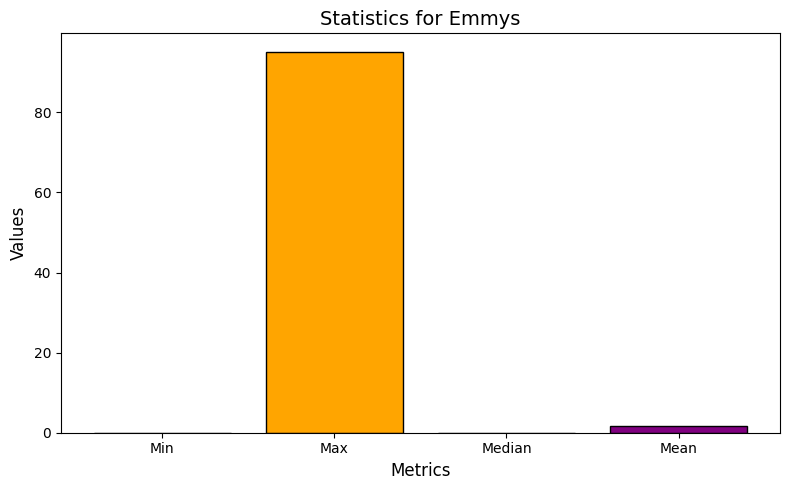

In [329]:

d = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']]

for column in d.columns:
    # Tính Min, Max, Median, và Mean
    min_val = d[column].min()
    max_val = d[column].max()
    median_val = d[column].median()
    mean_val = d[column].mean()

    
    print(f"Column: {column}")
    print(f"Min: {min_val}, Max: {max_val}, Median: {median_val}, Mean: {mean_val}")
    print("-" * 40)

    
    stats = {
        'Min': min_val,
        'Max': max_val,
        'Median': median_val,
        'Mean': mean_val
    }

    # Visualization
    plt.figure(figsize=(8, 5))
    plt.bar(stats.keys(), stats.values(), color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
    plt.title(f'Statistics for {column}', fontsize=14)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tight_layout()

   
    plt.show()



# Meaningful Question

| **Question**                                |**Meaning**                               |  
|-----------------------------------------------|-----------------------------------------------------------------------------------------|  
| **Question 1: Find the best program**         | Identify the best program based on the columns: Runtime, Rating, Number of Votes, an Emmys.              |  
| **Question 2: Trends in runtime and ratings over the years** | - Determine whether audiences prefer long or short programs. <br> - Analyze trends in ratings over time.   |  
| **Question 3: Explore the relationship between Rating and other columns** | - Identify the impact of runtime on ratings. <br> - Provide guidance on suitable runtime for new programs.  |  



**Question 1: Find the best program**

In [330]:
matrix_corr = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']].corr()
matrix_corr

,Runtime,Rating,Number of Votes,Emmys
Runtime,1.000000,-0.035431,0.058511,0.043912
Rating,-0.035431,1.000000,0.262723,0.177613
Number of Votes,0.058511,0.262723,1.000000,0.359516
Emmys,0.043912,0.177613,0.359516,1.000000


Here, we use the Min-Max Normalization method, which is a feature scaling technique. This method helps adjust the values of a variable so that they fall within a specific range, typically from 0 to 1. If you want read it, you con access [*Link*](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)).

In [331]:
df = pd.DataFrame(data)

# Min-Max Normalization
# For each column, apply the formula: (x - min) / (max - min)
df['Runtime_norm'] = (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())
# df['Rating_norm'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Votes_norm'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())
df['Emmys_norm'] = (df['Emmys'] - df['Emmys'].min()) / (df['Emmys'].max() - df['Emmys'].min())


Define weight and calculate score

In [332]:
runtime_weight = 1/3
# rating_weight = 1/4
votes_weight = 1/3
emmys_weight = 1/3

df['Composite Score'] = (
    df['Runtime_norm'] *runtime_weight +
    # df['Rating_norm'] * rating_weight +
    df['Votes_norm'] * votes_weight +
    df['Emmys_norm'] * emmys_weight
)

Visualization score

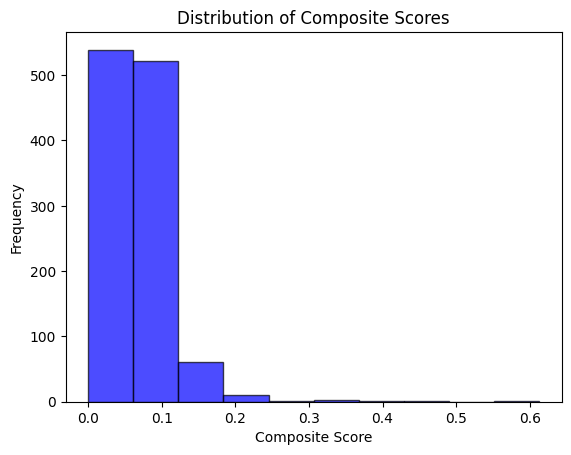

In [333]:

# Plot histogram of composite scores
plt.hist(df['Composite Score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()


Watch the best TV show

In [334]:

top_shows = df.nlargest(10, 'Composite Score')[['Title', 'Composite Score']]
print("Top 10 shows:")
print(top_shows)

Top 10 shows:
                    Title  Composite Score
1126      Game of Thrones         0.612815
617   Saturday Night Live         0.446099
1137         Breaking Bad         0.415751
6                The Idol         0.349193
124                  Dune         0.327066
1049      Stranger Things         0.307551
1115             Sherlock         0.277117
1132            Chernobyl         0.230920
1043         The Simpsons         0.215202
1125         The Sopranos         0.212253


**Question 2: Trends in runtime and ratings over the years**

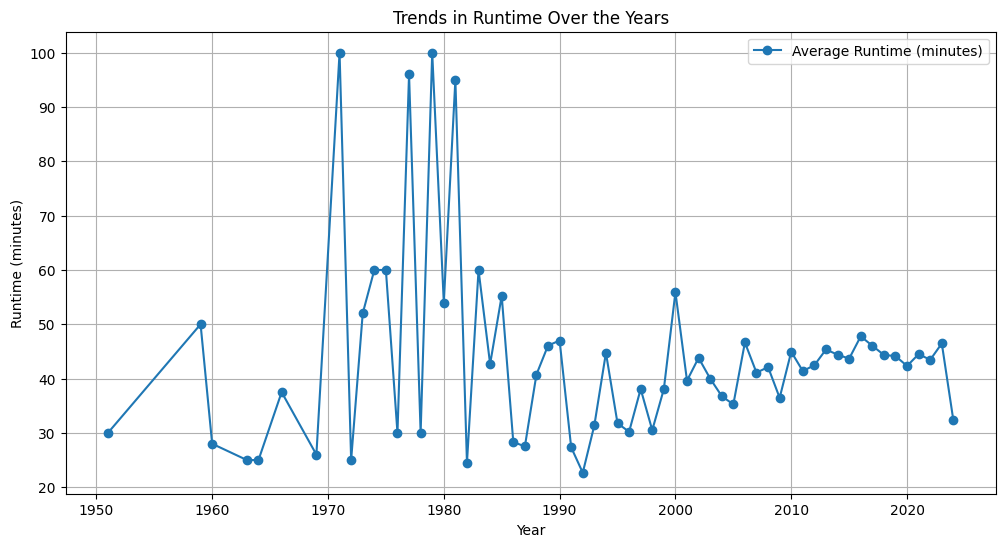

In [335]:

data[['Year_Start', 'Year_End']] = pd.DataFrame(data['Years'].tolist(), index=data.index)

data['Year'] = data['Year_Start']

grouped_data = data.groupby('Year')[['Runtime', 'Rating']].mean()


# Plot runtime trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Runtime'], marker='o', label='Average Runtime (minutes)')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.title('Trends in Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()





To better understand viewer preferences regarding program runtime, we can perform some analyses based on the available data, particularly focusing on Runtime and Rating

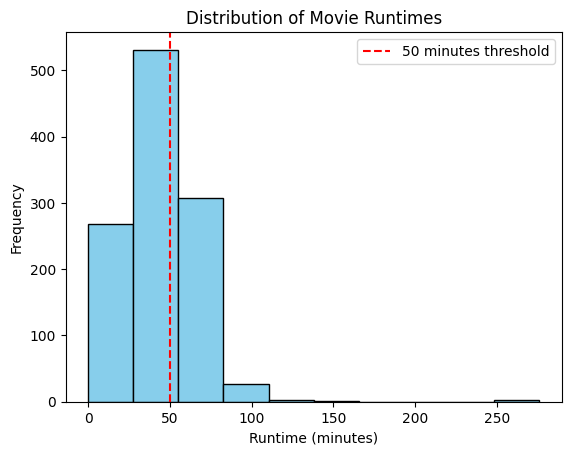

In [336]:
# Biểu đồ histogram để xem phân bố thời lượng của tất cả các bộ phim.
plt.hist(df['Runtime'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(50, color='red', linestyle='--', label='50 minutes threshold')
plt.legend()
plt.show()

It seems that viewers tend to prefer movies with shorter runtimes, especially those with a duration under 50 minutes. This could reflect a general audience preference for programs or movies that are easy to access and watch in a short amount of time, aligning with their busy lifestyles or content consumption habits. Shorter films allow viewers to complete them in one sitting without feeling overwhelmed, and they may also promote focus and a seamless viewing experience. This trend could also be related to the increasing number of people watching shows on online platforms, where viewers can easily choose and enjoy shorter movies that save time.

We will then proceed to search for and identify the locations of the shorter films in our list of top-ranked movies. This can help us better understand the relationship between runtime and movie rating quality. By examining the short films in this list, we can determine whether a shorter runtime is an important factor in the high ratings of these films.

In [337]:
# Lấy các bộ phim có thời lượng dưới 50 phút
short_runtime_movies = df[df['Runtime'] < 50]

# Lấy 20 bộ phim có Composite Score cao nhất từ short_runtime_movies
top_20_short_runtime = short_runtime_movies.nlargest(20, 'Composite Score')

# Tìm vị trí của các bộ phim đó trong danh sách toàn bộ dựa trên Composite Score
positions_in_all = df['Composite Score'].rank(ascending=False)
top_20_short_runtime['Rank in All'] = top_20_short_runtime['Composite Score'].rank(ascending=False).astype(int)

# Hiển thị kết quả
print("Các bộ phim dưới 50 phút:")
print(short_runtime_movies[['Title', 'Composite Score']])

print("\nTop 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):")
print(top_20_short_runtime[['Title', 'Composite Score', 'Rank in All']])

Các bộ phim dưới 50 phút:
                                Title  Composite Score
0                     Queen Cleopatra         0.062909
1                               Velma         0.037913
2     Keeping Up with the Kardashians         0.054123
3                            Batwoman         0.057436
4                         The Acolyte         0.056306
...                               ...              ...
1123      Cosmos: A Spacetime Odyssey         0.083260
1129                Sapne Vs Everyone         0.006456
1130                            Bluey         0.009577
1131       Avatar: The Last Airbender         0.082234
1137                     Breaking Bad         0.415751

[710 rows x 2 columns]

Top 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):
                                   Title  Composite Score  Rank in All
1137                        Breaking Bad         0.415751            1
1043                        The Simpsons         0.215202           

To easily identify and analyze, we will create a chart that clearly displays the positions of short films in our list of top-ranked movies. This chart will help us compare the movies based on two factors: runtime and rating (Rating). The visualization will allow us to quickly assess whether shorter films tend to receive higher ratings and how they stand relative to longer films in terms of audience evaluation.

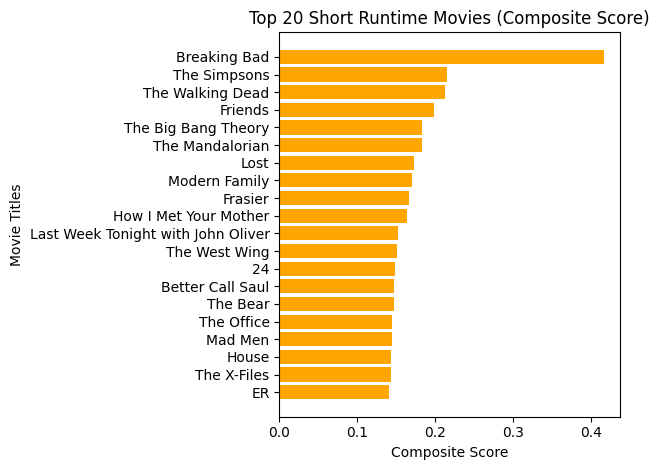

In [338]:
#Top 20 phim ngắn với Composite Score cao nhất
top_20_short_runtime = top_20_short_runtime.sort_values('Composite Score', ascending=True)

plt.barh(top_20_short_runtime['Title'], top_20_short_runtime['Composite Score'], color='orange')
plt.title('Top 20 Short Runtime Movies (Composite Score)')
plt.xlabel('Composite Score')
plt.ylabel('Movie Titles')
plt.tight_layout()
plt.show()


**Question 3: Explore the relationship between Rating and other columns**

To explore the relationship between the Runtime column and the other columns, we can conduct several analyses and visualizations. The goal is to understand how Runtime (the duration of the program or movie) correlates with other factors like Rating, Emmys, and Number of Votes.

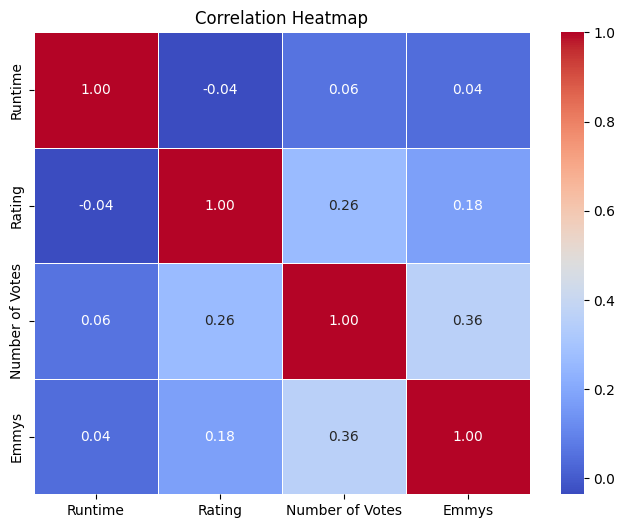

In [339]:

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


We notice that the **Number of Votes** column has a noticeable impact on the **Rating** column, with a correlation coefficient of 0.19. Although this number is not very high, it still indicates a slight relationship between the number of votes and the rating. This could mean that movies or programs that receive more votes from the audience tend to have higher ratings. This suggests that popular programs (those with more votes) are likely to be rated higher, possibly because they are viewed by a larger and more diverse audience, which could lead to a more favorable overall rating

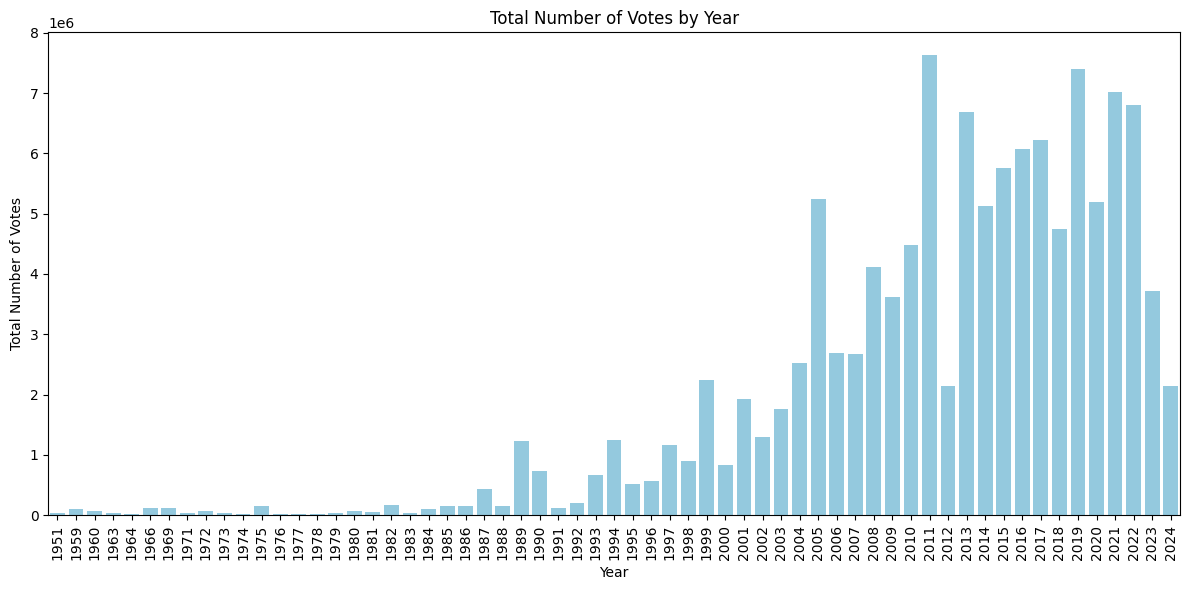

In [340]:

votes_by_year = data.groupby('Year')['Number of Votes'].sum().reset_index()

# Vẽ bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=votes_by_year, x='Year', y='Number of Votes', color='skyblue')


plt.title('Total Number of Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In recent years, the number of votes for movies has been steadily increasing, indicating that the film industry is thriving and attracting significant attention from audiences. For example, in 2021 and 2022, the number of votes for movies could reach up to **6,000,000 votes**. This reflects the growth in viewership and audience engagement with films, highlighting the increasing popularity of online platforms and streaming services, which provide a convenient way for audiences to participate in ratings and voting.

However, when collecting data from the website, we must note that the data for **2024** is still incomplete, as the year has not yet finished. Therefore, the number of votes for movies in 2024 will be lower than in previous years, and this number is likely to increase as the year concludes and movies continue to attract viewers and ratings in the remaining months.

# Train Model

In [344]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Chọn các đặc trưng (features) và nhãn (target)
X = data[['Runtime', 'Number of Votes', 'Emmys']]  # Các cột đầu vào
y = data['Rating']  # Cột đầu ra (nhãn)

# Chia tập train-test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình RandomForest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In các giá trị đánh giá
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² của mô hình RandomForest: {r2:.4f}")

# Lấy tầm quan trọng của các đặc trưng (feature importances)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# In tầm quan trọng của các đặc trưng
print("Tầm quan trọng của các đặc trưng:")
print(feature_importances)


Mean Squared Error (MSE): 0.5765
Mean Absolute Error (MAE): 0.5616
R² của mô hình RandomForest: 0.0484
Tầm quan trọng của các đặc trưng:
           Feature  Importance
1  Number of Votes    0.540540
0          Runtime    0.382493
2            Emmys    0.076967


We notice that the R² value of the RandomForest model is only 0.0484, which is very low compared to expectations. R² (the coefficient of determination) is an important metric for evaluating how well the model fits the actual data. The closer the R² value is to 1.0, the better the model explains the variability in the data. Conversely, a value close to 0, like in this case, indicates that the model explains only a very small portion of the data's variability.

With an R² value of 0.0484, this suggests that the RandomForest model performs very poorly in predicting or explaining the changes in the data. Specifically, the model explains only about 4.84% of the data's variability, meaning that it has not captured the important relationships between the factors in the dataset.

Here, we observe that two columns have a significant impact on the **Rating**, which are **Number of Votes** and **Runtime**. Specifically, **Number of Votes** has a correlation coefficient of **0.540540**, indicating that the more votes a movie receives, the higher its rating tends to be. This reflects the idea that movies with a larger viewership and more voter participation often receive higher ratings.

Additionally, **Runtime** also has a notable influence, with a correlation coefficient of **0.382493**. This suggests that the movie's duration plays an important role in shaping the viewer's rating. Movies with an appropriate runtime—neither too long nor too short—tend to receive higher ratings, as viewers may feel more comfortable while watching them. These factors together contribute to the overall rating given by the audience for the films.

Optimization: You can add some values such as:
- **n_estimators**: The number of trees in the forest. Increasing this value can improve the model's performance but also increases computation time. However, after a certain number of trees, the performance may not change much.
- **max_depth**: The maximum depth of each tree. Limiting the depth can help reduce overfitting.
- **min_samples_split**: The minimum number of samples required to split a node. Increasing this value can help reduce model complexity.
- **min_samples_leaf**: The minimum number of samples required at each leaf. This helps reduce overfitting by avoiding overly detailed splits.
- **max_features**: The maximum number of features to consider at each split. Limiting the number of features can help reduce model complexity.
- **bootstrap**: Specifies whether to use bootstrap sampling (sampling with replacement). Try both True and False to see the effect on the results.